In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
ddir = Path("/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space")

In [4]:
ddir.ls()

[PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/train-tif-v2.tar.7z'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/train-jpg.tar'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/train-jpg'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/test-jpg-additional.tar.7z'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/test-jpg.tar.7z'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/__MACOSX'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/Kaggle-planet-train-tif.torrent'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/test-tif-v2.tar.7z'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/test_v2_file_mapping.csv.zip

In [5]:
df = pd.read_csv(ddir/"train_v2.csv")

In [6]:
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [7]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [8]:
np.random.seed(42)

In [10]:
data = (ImageFileList.from_folder(ddir)
        .label_from_csv('train_v2.csv', sep=" ", folder="train-jpg", suffix=".jpg")
        .random_split_by_pct(0.2)
        .datasets(ImageMultiDataset)
        .transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

In [11]:
data.train_ds

DatasetTfm(ImageMultiDataset of len 32384)

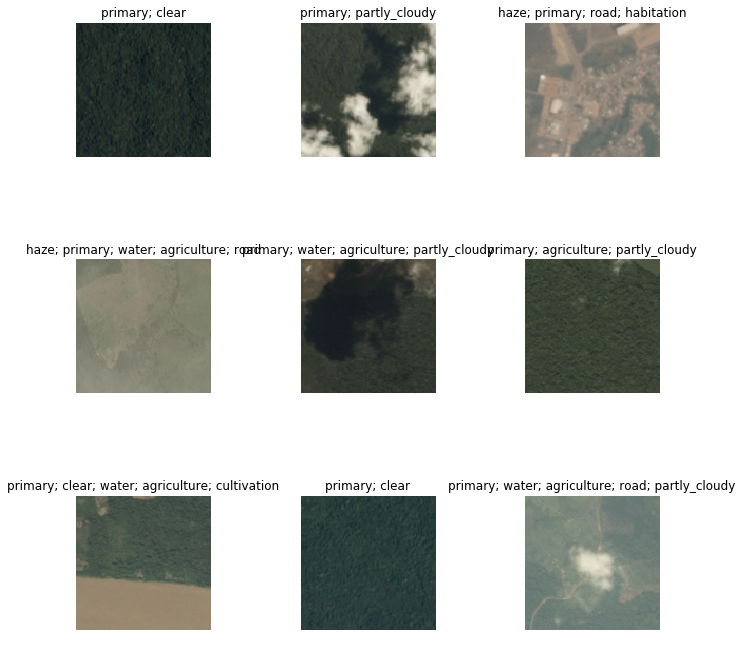

In [13]:
data.show_batch(rows=3, figsize=(10,10))